# Tutorial 7: For loops and Numerical Integration

## PHYS 2600

In [1]:
## Import cell

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## T7.0 - Practice with `for` loops

### Part A

Write a function that computes the factorial $n!=1\times 2\times\dots n$ for values $n\geq 1$. Be careful with your `range` start/end values!

In [2]:


def my_factorial(n):
    # YOUR IMPLEMENTATION HERE
    ### BEGIN SOLUTION
    n_factorial = 1
    for k in range(1, n+1):
        n_factorial *= k
    return n_factorial
    ### END SOLUTION


In [3]:
# Testing cell
assert my_factorial(1) == 1
assert my_factorial(3) == 6
assert my_factorial(13) == 6227020800

### Part B

For small values of $x$, the exponential function 

$$
\exp(x)=\sum_{k=0}^\infty \frac{1}{k!}x^k
$$

can be approximated by $n$-th partial sum

$$
s_n(x)=\sum_{k=0}^n \frac{1}{k!}x^k = 1 + \frac{1}{1!}x+\frac{1}{2!}x^2+\dots+\frac{1}{n!}x^n
$$

In the cell below, define a function that computes the $n$-th partial sum $s_n(x)$ using your `my_factorial` function from part A and a `for` loop.

In [4]:
def approx_exp(x, n):
    # YOUR IMPLEMENTATION HERE
    ### BEGIN SOLUTION
    val = 1
    for k in range(1, n+1):
        val += x**k/my_factorial(k)
    return val
    ### END SOLUTION



In [5]:
# Testing cell
assert abs(approx_exp(.1, 3)-np.exp(.1)) < 1e-4
assert abs(approx_exp(.5, 5)-np.exp(.5)) < 1e-4
assert abs(approx_exp(1.5, 10)-np.exp(1.5)) < 1e-4

### Part C

In lecture we used a `for` loop to approximate an integral using the trapezoidal rule:

$$
\int dx\ f(x) \approx a\frac{y_0+y_1}{2}+a\frac{y_1+y_2}{2}+\dots+a\frac{y_{N-3}+y_{N-2}}{2}+a\frac{y_{N-2}+y_{N-1}}{2}
$$

With a bit of algebra you can show that this sum simplifies to:

$$
\int dx\ f(x) \approx  \frac{a}{2} \left( y_0 + y_{N-1} \right) +  \sum_{i=1}^{N-2} a y_i
$$

In the cell below, use a `for` loop to approximate $\int_0^{2\pi}\sin^2(x) dx$ using the simplified formula for trapezoidal-rule quadrature.

In [6]:
def f(x):
    return np.sin(x)**2

N = 10
x_min, x_max = 0, 2*np.pi
a = (x_max-x_min)/(N-1)

y_0 = f(x_min)
y_N_minus_1 = f(x_max)
I = a*(y_0+y_N_minus_1)/2

# Use a for loop to compute the remaining terms in the sum
### BEGIN SOLUTION
for n in range(1, N-1):
    x_n = a*n
    y_n = f(x_n)
    I += a*y_n
print(f"{I=}")
### END SOLUTION

I=np.float64(3.141592653589793)


In [7]:
# Testing cell
assert abs(I-np.pi) < 1e-6

## T7.1 - Numerical integration with Numpy

We'll begin with a simple polynomial integral that we can do by hand:

$$
I_1 = \int_0^1 dx\ x^2 = \left. \frac{1}{3} x^3 \right|_0^1 = \frac{1}{3}.
$$
### Part A



The simplest form of numerical integration we can do is just replacing the integral with a sum:
$$
\int dx\ f(x) \approx a \sum_i f(x_i)
$$
where $a$ is the resolution, i.e. the distance between points in the regular grid $\{x_i\}$.  This is a very simple-minded and therefore very inaccurate formula - but it's still correct, i.e. we're guaranteed that as we sample at more and more points and $a \rightarrow 0$, the sum will approach the integral.

In the cell below, I've created a linspace `x_i` of 11 points, discretizing the interval $[0,1]$.  __Use `np.sum` to sum over this linspace__ and obtain an approximate value for $I_1$.

_(Note: even if you do this correctly, you won't get an answer which is very close to $1/3$!  However, your result should at least be within 0.1 of $1/3$, or you've done something wrong.)_


In [8]:
x_i = np.linspace(0, 1, 11)
print(x_i)

### BEGIN SOLUTION
y_i = x_i**2
a = 0.1
I_1 = a * np.sum(y_i)
I_1
### END SOLUTION

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


np.float64(0.38500000000000006)

### Part B

Since our first answer isn't very satisfactory, let's have a look at how increasing the number of points (i.e. reducing $a$) improves our estimate for $I_1$.  To make this more convenient, we'll write a function.

__Complete the function `sum_I1`__ in the cell below, taking a single argument `N`.  It should create a linspace of `N` points, and then return an estimate of $I_1$ over this linspace using the simple sum formula from part A.

In [9]:
def sum_I1(N):
    ### BEGIN SOLUTION
    x_i = np.linspace(0, 1, N)
    a = 1 / (N-1)

    return a * np.sum(x_i**2)
    ### END SOLUTION

There are no automated tests here, but the cell below will call your function with a few values of $N$ and print the results.  Two things you should verify from the results:

- `sum_I1(11)` had better be _exactly_ the same as your answer to part A!
- As `N` increases, the answer should get closer to the right answer of $1/3$.

In [10]:
print(sum_I1(11))
print(sum_I1(100))
print(sum_I1(10000))

0.38500000000000006
0.3384008434513486
0.3333833400008334


### Part C

Just looking at the printed-out results above will let you see that increasing `N` (or decreasing `a`) is certainly sending us closer to the right answer for $I_1$.  To get a better feel for how this convergence is happening, we should make some plots. 

First, __run the cell below__ to generate a plot showing `sum_I1(N)` for 8 different values of `N`.  I've also plotted the exact result of 1/3 as a dashed line, to guide your eye.

_(Side note: the cell below uses a new function called `np.vectorize()`.  As we've seen, NumPy is designed to carry out vector operations on arrays, and basic operators like `+` and `*` do this automatically.  But when we write our __own__ functions, they don't always work on arrays by default!  If you try to just call_

```
sum_I1(np.array([10, 20]))
```

_you'll get an error message since we assumed `N` was a number when we wrote `sum_I1()`.  To avoid having to rewrite our whole function, `np.vectorize()` is a sort of glue function: it acts on `sum_I1()` and returns a new function `vec_sum_I1()` which will happily take an array of `N` values and give back an array of answers.)_



Text(0, 0.5, '$I_1(N)$')

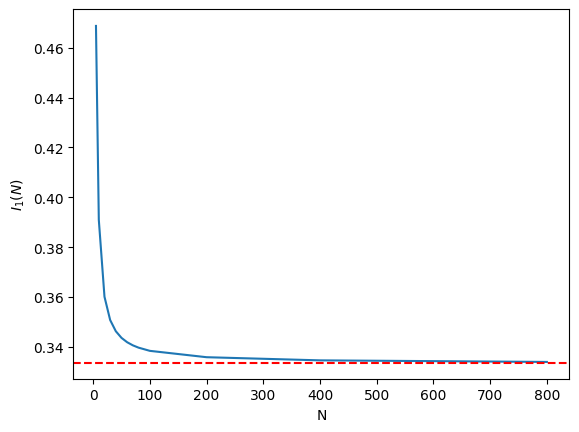

In [11]:
N_range = np.array([5, 10, 20, 30, 40, 50, 60, 70, 80, 100, 200, 400, 800])
vec_sum_I1 = np.vectorize(sum_I1)  # Fix sum_I1 to act on arrays of N values - see note above
I1_vs_N = vec_sum_I1(N_range)

plt.plot(N_range, I1_vs_N)
plt.axhline(1/3., color='r', ls='--')

plt.xlabel('N')
plt.ylabel('$I_1(N)$')

This lets us more explicitly see the convergence to the right answer, which looks something like $1/N$.  In fact, that is exactly what the dependence on $N$ is; the error in the sum approximation to an integral is "order $a$", which means it is proportional to $a$, and $a$ is (roughly) proportional to $1/N$.

In the cell below, __re-do the plot__ vs. $a$ instead of vs. $N$ - the extrapolation to the right answer should be much more obvious now!

_(Hint: You don't need to recompute `I1_vs_N` from above, you just need the `x` input to `plt.plot()` to be an array of `a` instead of an array of `N`.)_

Text(0, 0.5, '$I_1(N)$')

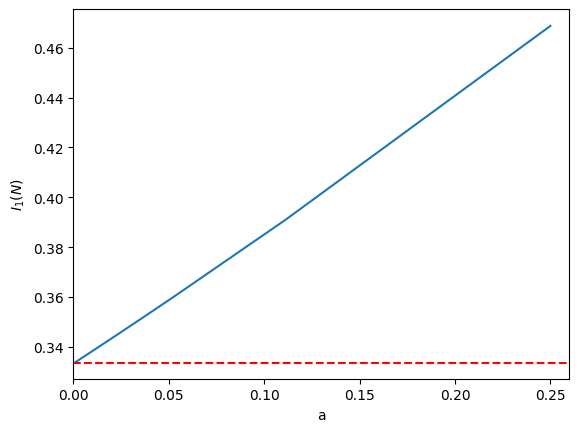

In [12]:
###BEGIN SOLUTION
a_range = 1/(N_range-1)
plt.plot(a_range, I1_vs_N)
plt.axhline(1/3., color='r', ls='--')
plt.xlim(0, 0.26)

plt.xlabel('a')
plt.ylabel('$I_1(N)$')
###END SOLUTION

### Part D

Finally, let's see what using a better integration algorithm can buy us.  __Complete the function `trap_I1(N)`__ in the cell below, which should create a linspace with `N` points just like `sum_I1()` above, but then use `np.trapezoid()` to compute and return $I_1$ instead.

In [13]:
def trap_I1(N):
    ### BEGIN SOLUTION
    x_i = np.linspace(0, 1, N)

    # One solution: just use the `x` option and let trapezoid figure out a.
    return np.trapezoid(x_i**2, x=x_i)

    # Another solution: compute a ourselves and use the 'dx' option.
    a = 1 / (N-1)
    return np.trapezoid(x_i**2, dx=a)
    ### END SOLUTION

In [14]:
print(trap_I1(11))  # Should now be within about 0.01 of 1/3

0.33499999999999996


Finally, make a comparison plot showing both the results of `sum_I1` and `trap_I1` as a function of the resolution $a$ - I've started you off below.  You should see that the trapezoidal results both scale faster (the error goes as $a^2$), and have a much smaller absolute value at the same $N$.

Text(0, 0.5, '$I_1(N)$')

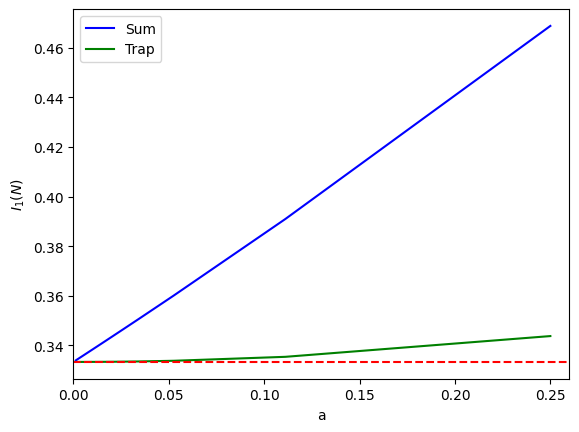

In [15]:
N_range = np.array([5,10, 20, 30, 40, 50, 60, 70, 80, 100, 200, 400, 800])
vec_sum_I1 = np.vectorize(sum_I1)
vec_trap_I1 = np.vectorize(trap_I1)

I1_sum_vs_N = vec_sum_I1(N_range)
I1_trap_vs_N = vec_trap_I1(N_range)

### BEGIN SOLUTION
a_range = 1/(N_range-1)
plt.plot(a_range, I1_sum_vs_N, color='blue', label='Sum')
plt.plot(a_range, I1_trap_vs_N, color='green', label='Trap')

plt.axhline(1/3., color='r', ls='--')
plt.xlim(0, 0.26)
plt.legend()

plt.xlabel('a')
plt.ylabel('$I_1(N)$')
### END SOLUTION


## T7.2 \- Dealing with indefinite integrals (optional challenge)

Now let's go back to the example integral from class:

$$
\int_0^\infty dx \frac{1}{(e^x+1)^2} =\ I
$$

The exact answer is $I = \ln(2) - 1/2 \approx 0.19315$.

I showed one way to deal with the indefinite interval, which was to change variables to $u=1/(1+e^x)$; then $u$ has a finite numerical interval to deal with.  In fact, you should _always_ prefer a nice change of variables when one is available!

However, there are other, more direct ways that we can deal with an indefinite integral.  For practice, let's try one.



### Part A

The first direct method we'll try for computing $I$ is __cutoff and extrapolate__.  We replace the upper limit at $\infty$ with a finite number $L$:
$$
I_L = \int_0^L dx\ \frac{1}{(e^x + 1)^2}
$$
and then try to make $L$ big enough that we get close to the right answer.  (Just as we extrapolated $a \rightarrow 0$ before, in principle we should be able to extrapolate $L \rightarrow \infty$ here.)

__Implement the function `cutoff_int(L, n)` below__, which uses `np.trapezoid` to calculate the integral $I_L$ for a given $L$, taking a grid of $N$ points.  For convenience, I've also given you a NumPy version of the integrand, `f(x)`.


In [16]:
def f(x):
    return 1/(1+np.exp(x))**2

def cutoff_int(L, N=100):
    ### BEGIN SOLUTION
    x = np.linspace(0,L,N)
    integrand = f(x)

    return np.trapezoid(integrand, x=x)
    ### END SOLUTION

print(cutoff_int(100))  # Correct integral is about 0.194...but this probably won't match!

0.2145941271034787


Now __run the cell below__ to plot the integral vs. the cutoff value, for a cutoff ranging from 10 up to 10000, keeping $n=100$ fixed.  (This uses `np.vectorize` again - see 7.1C.)

/tmp/ipykernel_175024/512263626.py:2: RuntimeWarning: overflow encountered in square
  return 1/(1+np.exp(x))**2
/tmp/ipykernel_175024/512263626.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(x))**2


Text(0, 0.5, 'integral w/cutoff L')

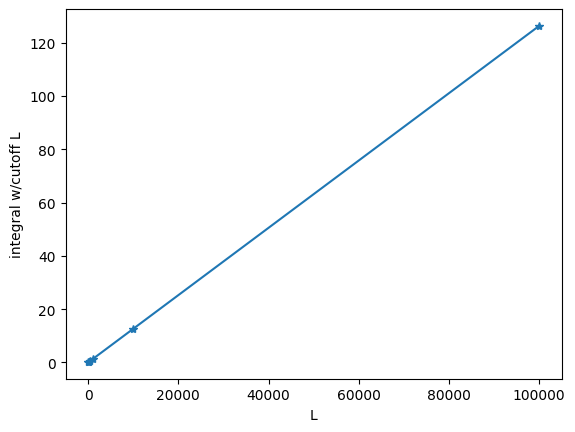

In [17]:
L_array = np.array([10, 100, 500, 1e3, 1e4, 1e5])
cutoff_int_V = np.vectorize(cutoff_int)

I_array = cutoff_int_V(L_array)
plt.plot(L_array, I_array, marker='*')
plt.xlabel('L')
plt.ylabel('integral w/cutoff L')

The integral is blowing up as we extend the cutoff further and further - our result is __unstable__ under increasing $L$!  This is obviously a problem for trying to extrapolate $L \rightarrow \infty$ to get a sensible answer for $I$...

What you're seeing is a symptom of discretization getting worse, because _we kept the number of points $n$ fixed_.  It's instructive to plot the function at relatively small $x$:

Text(0, 0.5, 'f(x)')

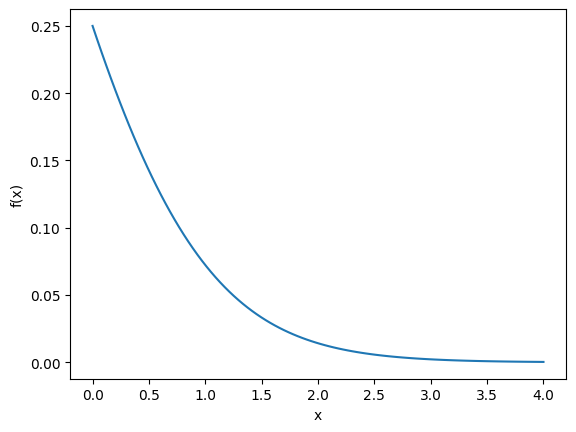

In [18]:
x = np.linspace(0,4,100)
plt.plot(x, 1/(1+np.exp(x))**2)
plt.xlabel('x')
plt.ylabel('f(x)')

We can immediately see a couple of things.  First, _most of the value of the integral is coming from the function near $x=0$_; already by $x=3$, the integrand is basically zero by eye.  So the divergence above isn't real; it's a symptom of trying to cover the range from 0 to 1,000,000 with only 100 points, which results in enormous errors right where the function is actually changing significantly.

One solution is just to __go back to the definition of `cutoff_int()` and make $N$ bigger__; give it a try.  You should be able to stabilize your results for smallish $L$, at least, without making $N$ too gigantic (and even an $N$ of 1 million should run pretty quickly.)  But for any fixed $N$, you'll see things start to break as you increase $L$.

### Part B

A smarter way to deal with this problem without transforming variables is __divide and conquer__.  Since we notice that the integral will be dominated by the function near $x=0$, it would be sensible to deal with it precisely in a region close to 0, and then lower our precision further away.  So we can divide the integral up like this:

$$
I_{DC} = \int_0^K dx\ f(x) + \int_K^L dx\ f(x)
$$

where $L$ is still our overall cutoff, but we introduce a second point $x=K$, known as the __breakpoint__.  If we keep $K$ relatively small, we can ensure a fine grid in the region where it counts, and then extrapolate the cutoff $L$ away with small errors.




This has two advantages: one, it will improve our estimate when $L$ is relatively small; and two, the asymptotic answer gives us a good handle on how fast we expect our answer to converge to the right one, so we don't need to take $L$ arbitrarily large.

__Implement the function `divide_conquer_int(L, n, K)` below__, and make sure you get the right answer (-1/2 + log(2)) for the default values of $n$ and $K$ and a reasonably large cutoff $L$.  Use $n$ points for each of the two linspaces (from 0 to K and K to L), to keep the behavior simple.



In [19]:
def divide_conquer_int(L, n=100, K=4.0):
    ### BEGIN SOLUTION
    x1 = np.linspace(0,K,n)
    x2 = np.linspace(K,L,n)

    I_1 = np.trapezoid(f(x1), x=x1)
    I_2 = np.trapezoid(f(x2), x=x2)

    return I_1 + I_2

print(divide_conquer_int(100))
print(-0.5 + np.log(2))

### END SOLUTION


0.1932281868745853
0.1931471805599453


Finally, __run the cell below__ to plot $I_{DC}$ vs. $I_L$ for various $L$, and compare how the convergence has improved.  (Go back and change the default back to `N=100` in `cutoff_int()` first, to make sure you're comparing apples to apples.)

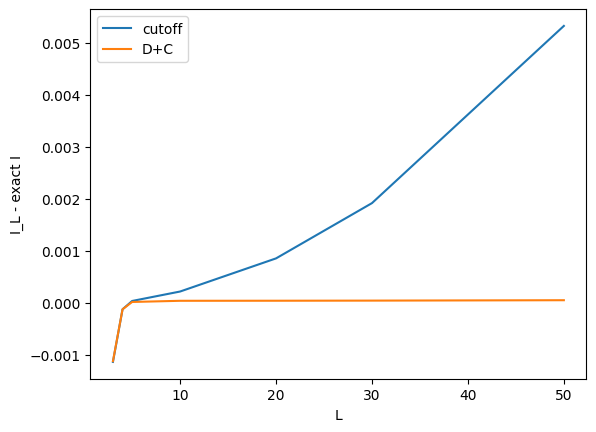

In [20]:
L_array = np.array([3,4,5,10,20,30,50])

dc_int_V = np.vectorize(divide_conquer_int)

IC_array = cutoff_int_V(L_array)
IDC_array = dc_int_V(L_array)

exact_I = -0.5 + np.log(2)
plt.plot(L_array, IC_array-exact_I, label='cutoff')
plt.plot(L_array, IDC_array-exact_I, label='D+C')

plt.xlabel('L')
plt.ylabel('I_L - exact I')
plt.legend()

Our result from divide and conquer is nice and stable as the cutoff increases, and quickly approaches the exact answer (even beating the cutoff-only method at small $L$.)

Another variation on divide-and conquer would be to replace $f(x)$ with an easier _approximation_ further away.  For sufficiently large $x$, we notice that

$$
\frac{1}{(1+e^x)^2} \approx \frac{1}{(e^x)^2} = e^{-2x}
$$

which is a much simpler function to integrate by hand:
$$
\int_L^\infty dx\ e^{-2x} = -\left. \frac{1}{2} e^{-2x}\right|_L^\infty = \frac{1}{2} e^{-2L}
$$

So we could combine our cutoff integral above with the asymptotic result:
$$
I \approx I_L + \frac{1}{2} e^{-2L}.
$$

This will help the convergence of the cutoff-only method, but we will still run into trouble if we make $L$ too big without compensating by adjusting $n$.
